<a href="https://colab.research.google.com/github/yDaraAlves/Ci-ncias-de-Dados/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [5]:
import pandas as pd

In [53]:
# Converter para DataFrame
dados = pd.read_json("/content/TelecomX_Data.json")

In [ ]:
dados

In [54]:
df_normalizar_customer = pd.json_normalize(dados['customer'])
df_normalizar_phone = pd.json_normalize(dados['phone'])
df_normalizar_internet = pd.json_normalize(dados['internet'])
df_normalizar_account = pd.json_normalize(dados['account'])


In [73]:
df_final = pd.concat([dados[['customerID', 'Churn']], df_normalizar_customer, df_normalizar_phone, df_normalizar_internet, df_normalizar_account], axis=1)
display(df_final.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [74]:
column_translation = {
    'customerID': 'ID_Cliente',
    'Churn': 'Evasao',
    'gender': 'Genero',
    'SeniorCitizen': 'Idoso',
    'Partner': 'Parceiro',
    'Dependents': 'Dependentes',
    'tenure': 'Meses_Cliente',
    'PhoneService': 'Servico_Telefone',
    'MultipleLines': 'Multiplas_Linhas',
    'InternetService': 'Servico_Internet',
    'OnlineSecurity': 'Seguranca_Online',
    'OnlineBackup': 'Backup_Online',
    'DeviceProtection': 'Protecao_Dispositivo',
    'TechSupport': 'Suporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Filmes',
    'Contract': 'Contrato',
    'PaperlessBilling': 'Fatura_Digital',
    'PaymentMethod': 'Metodo_Pagamento',
    'Charges.Monthly': 'Cobranca_Mensal',
    'Charges.Total': 'Cobranca_Total'
}

df_final = df_final.rename(columns=column_translation)
print('Colunas do DataFrame traduzidas para português:')
display(df_final.head())

Colunas do DataFrame traduzidas para português:


,ID_Cliente,Evasao,Genero,Idoso,Parceiro,Dependentes,Meses_Cliente,Servico_Telefone,Multiplas_Linhas,Servico_Internet,...,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato,Fatura_Digital,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformação

In [75]:
print('Verificando valores ausentes:')
missing_values = df_final.isnull().sum()
display(missing_values[missing_values > 0])

Verificando valores ausentes:


,0


In [76]:
print('\nVerificando linhas duplicadas:')
duplicate_rows = df_final.duplicated().sum()
print(f'Número de linhas duplicadas: {duplicate_rows}')



Verificando linhas duplicadas:
Número de linhas duplicadas: 0


In [77]:
# Verificando os tipos de dados das colunas
print(df_final.dtypes)

ID_Cliente               object
Evasao                   object
Genero                   object
Idoso                     int64
Parceiro                 object
Dependentes              object
Meses_Cliente             int64
Servico_Telefone         object
Multiplas_Linhas         object
Servico_Internet         object
Seguranca_Online         object
Backup_Online            object
Protecao_Dispositivo     object
Suporte_Tecnico          object
Streaming_TV             object
Streaming_Filmes         object
Contrato                 object
Fatura_Digital           object
Metodo_Pagamento         object
Cobranca_Mensal         float64
Cobranca_Total           object
dtype: object


In [80]:
print('Convertendo a coluna "Cobranca_Total" para float...')
df_final['Cobranca_Total'] = pd.to_numeric(df_final['Cobranca_Total'], errors='coerce')
df_final['Cobranca_Total'] = df_final['Cobranca_Total'].fillna(0)

print('Verificando os tipos de dados após a conversão:')
print(df_final.dtypes)

print('\nPrimeiras linhas do DataFrame com a coluna "Cobranca_Total" convertida:')
display(df_final.head())

Convertendo a coluna "Cobranca_Total" para float...
Verificando os tipos de dados após a conversão:
ID_Cliente               object
Evasao                   object
Genero                   object
Idoso                     int64
Parceiro                 object
Dependentes              object
Meses_Cliente             int64
Servico_Telefone         object
Multiplas_Linhas         object
Servico_Internet         object
Seguranca_Online         object
Backup_Online            object
Protecao_Dispositivo     object
Suporte_Tecnico          object
Streaming_TV             object
Streaming_Filmes         object
Contrato                 object
Fatura_Digital           object
Metodo_Pagamento         object
Cobranca_Mensal         float64
Cobranca_Total          float64
dtype: object

Primeiras linhas do DataFrame com a coluna "Cobranca_Total" convertida:


,ID_Cliente,Evasao,Genero,Idoso,Parceiro,Dependentes,Meses_Cliente,Servico_Telefone,Multiplas_Linhas,Servico_Internet,...,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato,Fatura_Digital,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [81]:
df_final['Contas_Diarias'] = df_final['Cobranca_Mensal'] / 30.4
print('Coluna "Contas_Diarias" criada com sucesso:')
display(df_final.head())

Coluna "Contas_Diarias" criada com sucesso:


,ID_Cliente,Evasao,Genero,Idoso,Parceiro,Dependentes,Meses_Cliente,Servico_Telefone,Multiplas_Linhas,Servico_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato,Fatura_Digital,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.157895
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.970395
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.430921
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.223684
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.759868


In [82]:
print('Convertendo colunas binárias de texto para numérico (1 e 0)...')

# Mapeamento para colunas 'Yes'/'No'
mapeamento_sim_nao = {'Yes': 1, 'No': 0}

# Colunas para aplicar o mapeamento 'Yes'/'No'
colunas_sim_nao = [
    'Evasao',
    'Parceiro',
    'Dependentes',
    'Servico_Telefone',
    'Fatura_Digital'
]

for col in colunas_sim_nao:
    if col in df_final.columns:
        df_final[col] = df_final[col].map(mapeamento_sim_nao)

# Mapeamento para a coluna 'Genero'
mapeamento_genero = {'Male': 1, 'Female': 0}
if 'Genero' in df_final.columns:
    df_final['Genero'] = df_final['Genero'].map(mapeamento_genero)

# Lidando com colunas que possuem 'No internet service' ou 'No phone service'
# Nestes casos, 'No internet service'/'No phone service' também pode ser mapeado para 0 (ausência do serviço/opção)
mapeamento_servico = {
    'Yes': 1,
    'No': 0,
    'No internet service': 0, # Considera a ausência do serviço como 'No'
    'No phone service': 0      # Considera a ausência do serviço como 'No'
}

colunas_servico = [
    'Multiplas_Linhas',
    'Seguranca_Online',
    'Backup_Online',
    'Protecao_Dispositivo',
    'Suporte_Tecnico',
    'Streaming_TV',
    'Streaming_Filmes'
]

for col in colunas_servico:
    if col in df_final.columns:
        df_final[col] = df_final[col].map(mapeamento_servico)


print('\nVerificando os tipos de dados após a conversão:')
print(df_final.dtypes)

print('\nPrimeiras linhas do DataFrame após a padronização:')
display(df_final.head())


Convertendo colunas binárias de texto para numérico (1 e 0)...

Verificando os tipos de dados após a conversão:
ID_Cliente               object
Evasao                  float64
Genero                    int64
Idoso                     int64
Parceiro                  int64
Dependentes               int64
Meses_Cliente             int64
Servico_Telefone          int64
Multiplas_Linhas          int64
Servico_Internet         object
Seguranca_Online          int64
Backup_Online             int64
Protecao_Dispositivo      int64
Suporte_Tecnico           int64
Streaming_TV              int64
Streaming_Filmes          int64
Contrato                 object
Fatura_Digital            int64
Metodo_Pagamento         object
Cobranca_Mensal         float64
Cobranca_Total          float64
Contas_Diarias          float64
dtype: object

Primeiras linhas do DataFrame após a padronização:


,ID_Cliente,Evasao,Genero,Idoso,Parceiro,Dependentes,Meses_Cliente,Servico_Telefone,Multiplas_Linhas,Servico_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato,Fatura_Digital,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total,Contas_Diarias
0,0002-ORFBO,0.0,0,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.157895
1,0003-MKNFE,0.0,1,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.970395
2,0004-TLHLJ,1.0,1,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.430921
3,0011-IGKFF,1.0,1,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.223684
4,0013-EXCHZ,1.0,0,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.759868


In [89]:
df_final

,ID_Cliente,Evasao,Genero,Idoso,Parceiro,Dependentes,Meses_Cliente,Servico_Telefone,Multiplas_Linhas,Servico_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato,Fatura_Digital,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total,Contas_Diarias
0,0002-ORFBO,0.0,0,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.157895
1,0003-MKNFE,0.0,1,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.970395
2,0004-TLHLJ,1.0,1,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.430921
3,0011-IGKFF,1.0,1,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.223684
4,0013-EXCHZ,1.0,0,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.759868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0.0,0,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.814145
7263,9992-RRAMN,1.0,1,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.799342
7264,9992-UJOEL,0.0,1,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.654605
7265,9993-LHIEB,0.0,1,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.231908


#📊 Carga e análise

In [92]:
total_registros = len(df_final)
cancelou_vazios = df_final['Evasao'].isna().sum()
percentual_vazios = (cancelou_vazios / total_registros) * 100

print("=" * 60)
print("⚠️ ANÁLISE PROFUNDA: VALORES VAZIOS EM 'Evasao'")
print("=" * 60)
print("\n📊 SITUAÇÃO ATUAL:")
print(f"• Total de registros: {total_registros:,}")
print(f"• Registros com 'Evasao' vazio: {cancelou_vazios}")
print(f"• Percentual: {percentual_vazios:.2f}%")

# ===============================
# 3. Filtrar registros problemáticos
# ===============================
df_cancelou_vazio = df_final[df_final['Evasao'].isna()]

print("\n" + "=" * 60)
print(f"🔍 INVESTIGANDO OS {cancelou_vazios} REGISTROS PROBLEMÁTICOS")
print("=" * 60)

# ===============================
# 4. Exibir amostra (primeiros 10)
# ===============================
colunas_interesse = [
    'ID_Cliente',
    'Evasao',
    'Meses_Cliente',
    'Cobranca_Mensal',
    'Cobranca_Total',
    'Contrato',
    'Servico_Internet'
]

print("\n📄 Amostra (primeiros 10):\n")
print(df_cancelou_vazio[colunas_interesse].head(10))


⚠️ ANÁLISE PROFUNDA: VALORES VAZIOS EM 'Evasao'

📊 SITUAÇÃO ATUAL:
• Total de registros: 7,267
• Registros com 'Evasao' vazio: 224
• Percentual: 3.08%

🔍 INVESTIGANDO OS 224 REGISTROS PROBLEMÁTICOS

📄 Amostra (primeiros 10):

     ID_Cliente  Evasao  Meses_Cliente  Cobranca_Mensal  Cobranca_Total  \
30   0047-ZHDTW     NaN             11            79.00          929.30   
75   0120-YZLQA     NaN             71            19.90         1355.10   
96   0154-QYHJU     NaN             29            58.75         1696.20   
98   0162-RZGMZ     NaN              5            59.90          287.85   
175  0274-VVQOQ     NaN             65           103.15         6792.45   
219  0328-IBUPK     NaN             51            34.20         1782.00   
312  0448-YZNZE     NaN             27            95.55         2510.20   
351  0510-EXSMQ     NaN              9            69.05          651.50   
368  0530-HBKHZ     NaN              1            24.80           24.80   
374  0534-JRNIG     NaN 

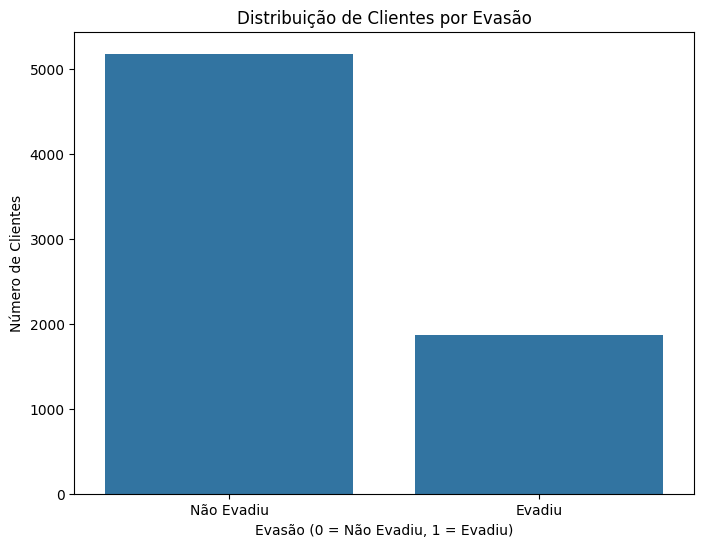

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='Evasao', data=df_final)
plt.title('Distribuição de Clientes por Evasão')
plt.xlabel('Evasão (0 = Não Evadiu, 1 = Evadiu)')
plt.ylabel('Número de Clientes')
plt.xticks([0, 1], ['Não Evadiu', 'Evadiu'])
plt.show()

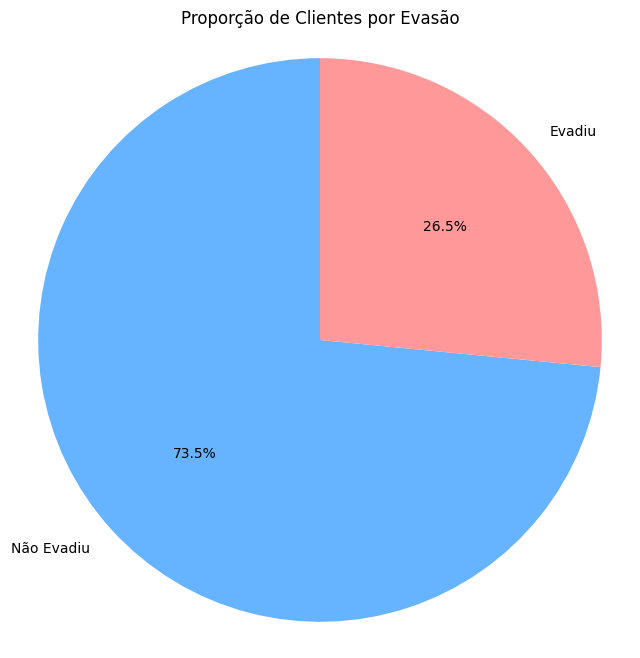

In [94]:
churn_counts = df_final['Evasao'].value_counts()
churn_labels = ['Não Evadiu', 'Evadiu']

plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=churn_labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Proporção de Clientes por Evasão')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

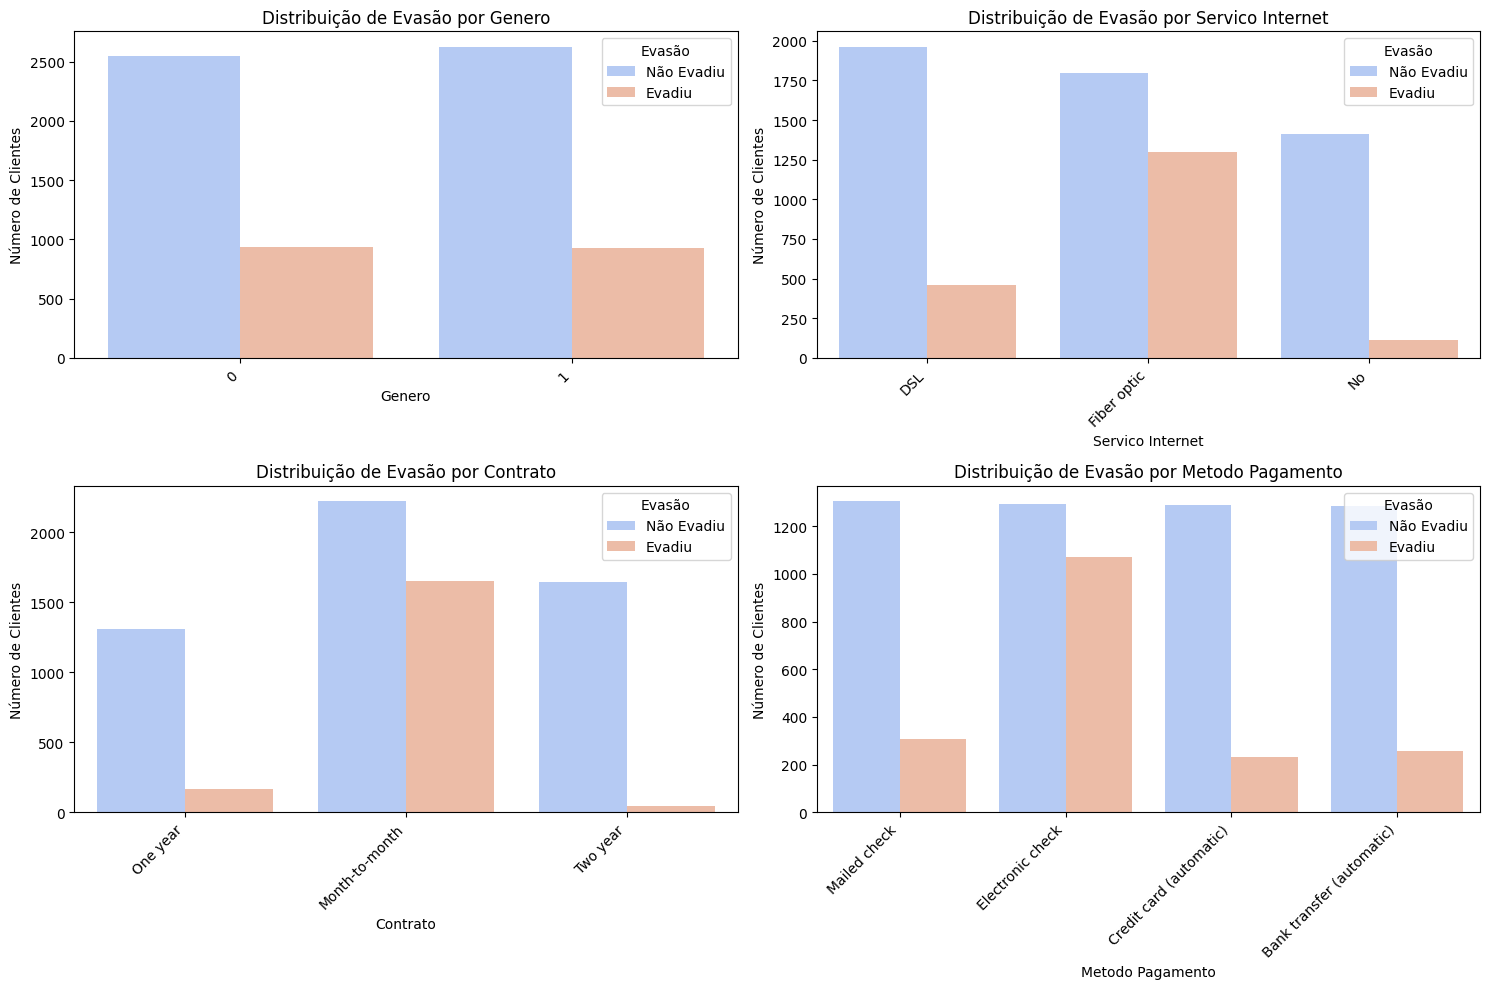

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = [
    'Genero',
    'Servico_Internet',
    'Contrato',
    'Metodo_Pagamento'
]

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df_final, x=col, hue='Evasao', palette='coolwarm')
    plt.title(f'Distribuição de Evasão por {col.replace("_", " ")}')
    plt.xlabel(col.replace("_", " "))
    plt.ylabel('Número de Clientes')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Evasão', labels=['Não Evadiu', 'Evadiu'])

plt.tight_layout()
plt.show()

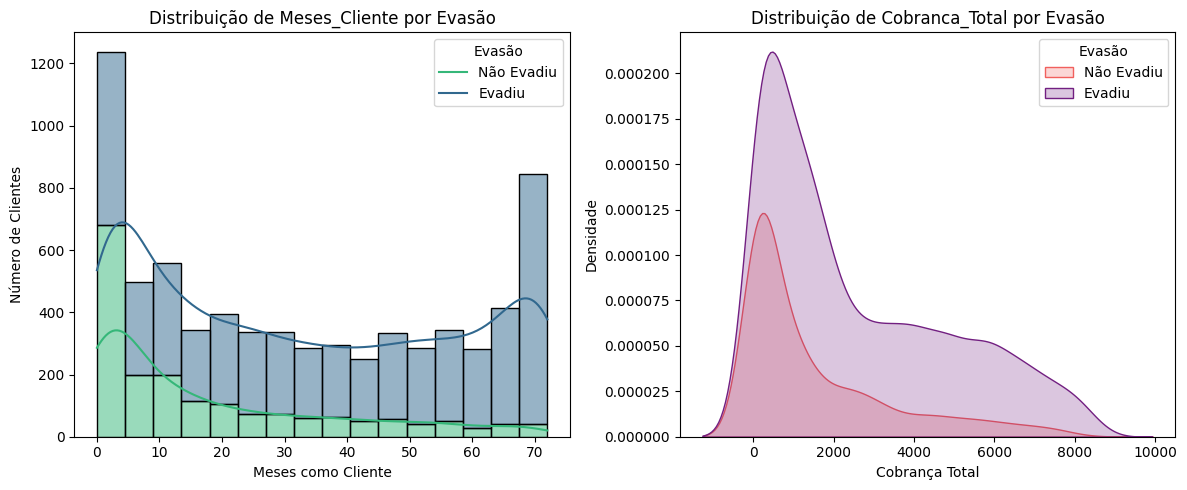

In [96]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df_final, x='Meses_Cliente', hue='Evasao', multiple='stack', palette='viridis', kde=True)
plt.title('Distribuição de Meses_Cliente por Evasão')
plt.xlabel('Meses como Cliente')
plt.ylabel('Número de Clientes')
plt.legend(title='Evasão', labels=['Não Evadiu', 'Evadiu'])

plt.subplot(1, 2, 2)
sns.kdeplot(data=df_final, x='Cobranca_Total', hue='Evasao', fill=True, palette='magma')
plt.title('Distribuição de Cobranca_Total por Evasão')
plt.xlabel('Cobrança Total')
plt.ylabel('Densidade')
plt.legend(title='Evasão', labels=['Não Evadiu', 'Evadiu'])

plt.tight_layout()
plt.show()

#📄Relatorio Final

## Conclusões da Análise de Churn - Telecom X

Com base na análise aprofundada, identificamos os seguintes pontos chave:

*   **Proporção Geral de Churn:** Aproximadamente **26.5% dos clientes evadiram**, enquanto a maioria (73.5%) permaneceu. Este desequilíbrio é um ponto importante para futuras modelagens.

*   **Churn por Tipo de Contrato:** Clientes com **contratos mensais ('Month-to-month')** apresentam uma taxa de evasão significativamente maior em comparação com contratos de um ou dois anos. Contratos de longo prazo demonstram maior fidelização.

*   **Churn vs. Serviços de Suporte (Serviço de Internet):** Clientes com serviço de **Fibra Óptica ('Fiber optic')** mostram uma taxa de evasão notavelmente mais alta, sugerindo possíveis problemas de qualidade ou satisfação específicos com este serviço.

*   **Churn vs. Cobrança Mensal e Total:** Clientes que evadiram geralmente têm uma **'Cobranca_Total' mais baixa**, o que está correlacionado com menor tempo de serviço ('Meses_Cliente'). Isso indica que clientes com menores gastos acumulados (e, por extensão, possivelmente menor cobrança mensal por mais tempo) são mais propensos a evadir.

**Conclusão Final :** Os principais fatores que influenciam a evasão de clientes na Telecom X são os **contratos mensais**, o uso de **Fibra Óptica** como serviço de internet, o método de pagamento **'Electronic check'** e o **curto tempo de permanência** do cliente. Os primeiros meses de serviço são cruciais para a retenção.